In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from copy import copy
from scipy import stats
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go

In [2]:
stocks_df = pd.read_excel("/content/muertes y bolsas asiaticas.xlsx")
stocks_df

,Date,new_deaths_per_million,N225,HSI,SSE,SZ,TWII
0,2020-01-27,0.003,23343.509766,27160.630859,2746.605957,9779.669922,11421.740234
1,2020-01-28,0.006,23215.710938,26449.130859,2783.288086,10089.669922,11495.099609
2,2020-01-29,0.000,23379.400391,26312.630859,2818.087891,10305.500000,11354.919922
3,2020-01-30,0.005,22977.750000,26356.980469,2866.510010,10601.339844,11555.919922
4,2020-01-31,0.005,23205.179688,26675.980469,2875.959961,10611.549805,11573.620117
...,...,...,...,...,...,...,...
696,2022-10-28,0.184,27777.900391,17655.910156,3206.949951,11501.580078,14556.870117
697,2022-10-31,0.151,27820.400391,17424.410156,3179.040039,11399.129883,14709.639648
698,2022-11-01,0.348,27885.869141,17523.810547,3176.330078,11323.700195,14879.549805
699,2022-11-02,0.225,27686.400391,17660.900391,3176.530029,11321.809570,15012.799805


In [3]:
# Print out the number of stocks

print('Total Number of stocks : {}'.format(len(stocks_df.columns[1:])))

Total Number of stocks : 6


In [4]:
# Print the name of stocks
print('Stocks under consideration are:')

for i in stocks_df.columns[1:]:
  print(i)

Stocks under consideration are:
new_deaths_per_million
N225
HSI
SSE
SZ
TWII


In [5]:
stocks_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    701 non-null    datetime64[ns]
 1   new_deaths_per_million  701 non-null    float64       
 2   N225                    701 non-null    float64       
 3   HSI                     701 non-null    float64       
 4   SSE                     701 non-null    float64       
 5   SZ                      701 non-null    float64       
 6   TWII                    701 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 38.5 KB


In [8]:
def show_plot(df, fig_title):
  df.plot(x = 'Date', figsize = (15,7), linewidth = 3, title = fig_title)
  plt.grid()
  plt.show()

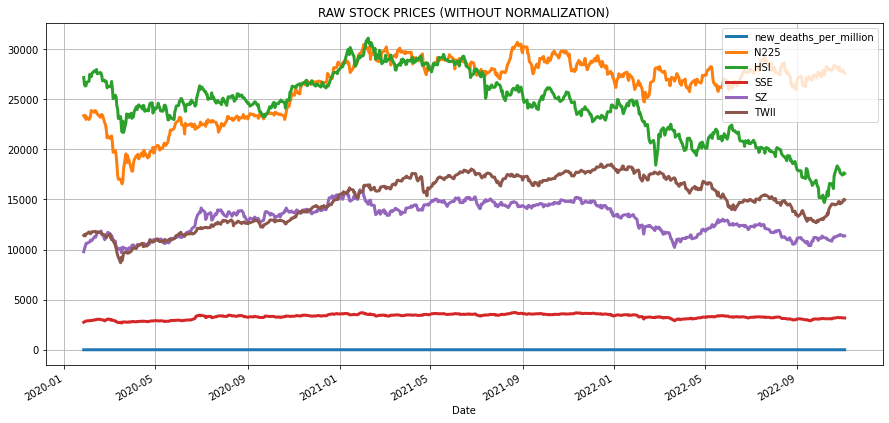

In [9]:
show_plot(stocks_df, 'RAW STOCK PRICES (WITHOUT NORMALIZATION)')

In [10]:
def interactive_plot(df, title):
  fig = px.line(title = title)
  
  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    fig.add_scatter(x = df['Date'], y = df[i], name = i) # add a new Scatter trace

  fig.show()

In [11]:
# Plot interactive chart
interactive_plot(stocks_df, 'Prices')

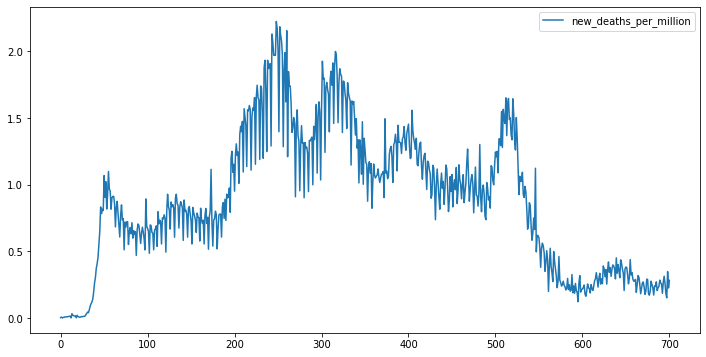

In [12]:
stocks_df[['new_deaths_per_million']].plot(figsize=(12,6));

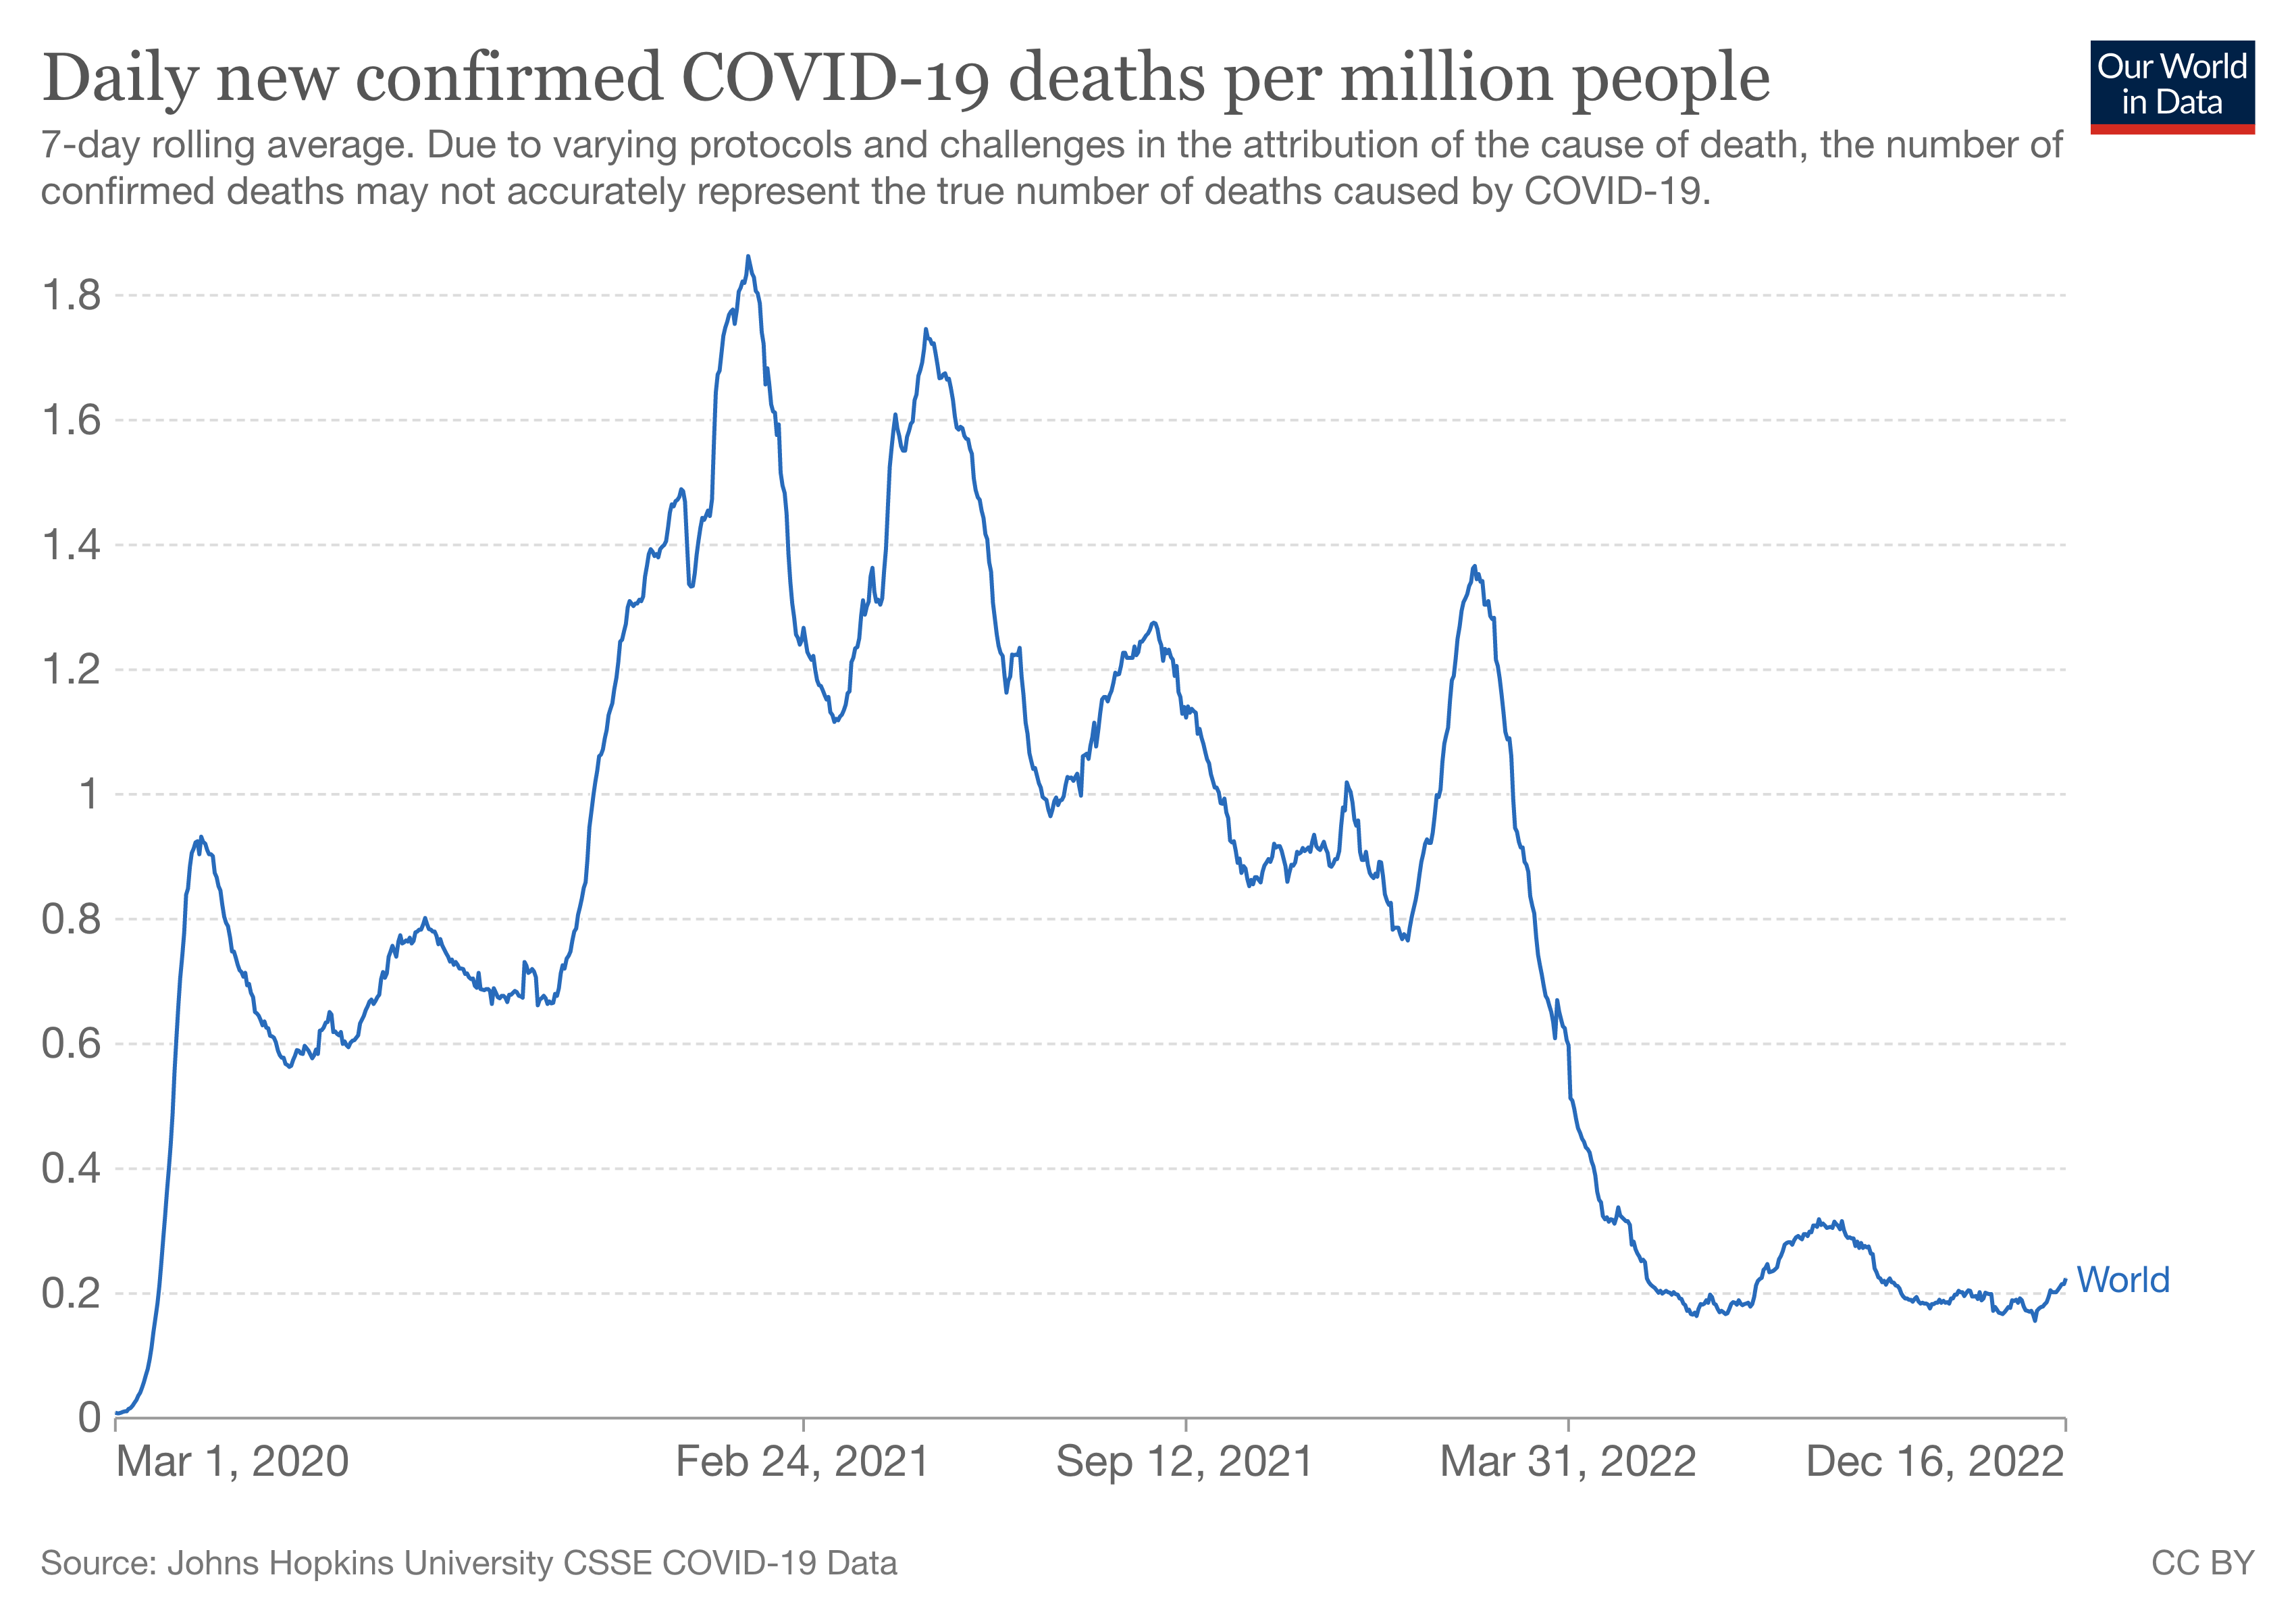

In [13]:
# Let's define a function to calculate stocks daily returns (for all stocks) 
def daily_return(df):
  df_daily_return = df.copy()

  # Loop through each stock (while ignoring time columns with index 0)
  for i in df.columns[1:]:
    
    # Loop through each row belonging to the stock
    for j in range(1, len(df)):

      # Calculate the percentage of change from the previous day
      df_daily_return[i][j] = ((df[i][j]- df[i][j-1])/df[i][j-1]) * 100
    
    # set the value of first row to zero since the previous value is not available
    df_daily_return[i][0] = 0
  
  return df_daily_return

In [14]:
# Get the daily returns 
stocks_daily_return = daily_return(stocks_df)

<ipython-input-13-a30cc0baca62>:12: RuntimeWarning:

divide by zero encountered in double_scalars



In [16]:
stocks_daily_return.to_excel("stocks_daily_return.xlsx")

In [18]:
stocks_daily_return = pd.read_excel("/content/stocks_daily_return .xlsx") 

In [19]:
stocks_daily_return.head()

,Date,new_deaths_per_million,N225,HSI,SSE,SZ,TWII
0,2020-01-27,0.003,0.000000,0.000000,0.000000,0.000000,0.000000
1,2020-01-28,0.006,-0.547470,-2.619600,1.335544,3.169841,0.642278
2,2020-01-29,0.000,0.705081,-0.516085,1.250313,2.139119,-1.219473
3,2020-01-30,0.005,-1.717967,0.168549,1.718261,2.870699,1.770158
4,2020-01-31,0.005,0.989782,1.210306,0.329667,0.096308,0.153170


In [20]:
#Describe of the returns
stocks_daily_return.describe()

,new_deaths_per_million,N225,HSI,SSE,SZ,TWII
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,0.881292,0.033356,-0.049008,0.026308,0.031885,0.046128
std,0.518464,1.387107,1.621004,1.087254,1.450197,1.226368
min,0.000000,-6.080833,-6.356314,-5.131650,-6.084312,-5.828716
25%,0.408000,-0.725719,-0.910433,-0.548384,-0.730474,-0.596695
50%,0.870000,0.043352,-0.028824,0.038902,0.036167,0.079633
75%,1.260000,0.743984,0.797761,0.625370,0.912569,0.775385
max,2.224000,8.038101,9.081796,5.711348,4.372259,6.367105


In [22]:
# Daily Return Correlation
cm = stocks_daily_return.drop(columns = ['Date']).corr()

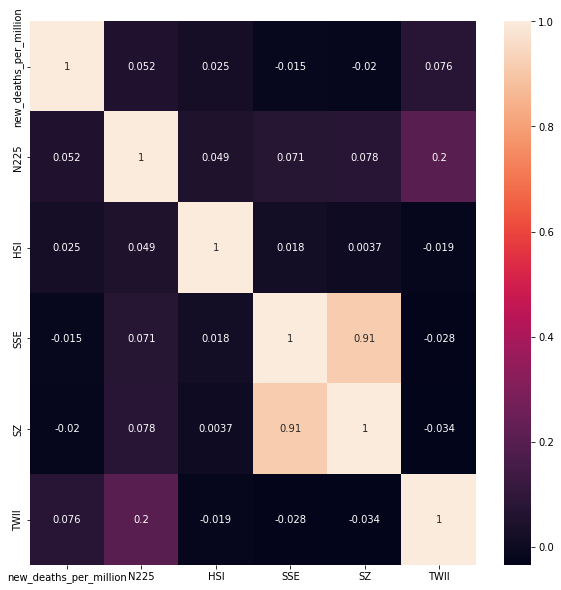

In [23]:
plt.figure(figsize=(10, 10))
ax = plt.subplot()
sns.heatmap(cm, annot = True, ax = ax);

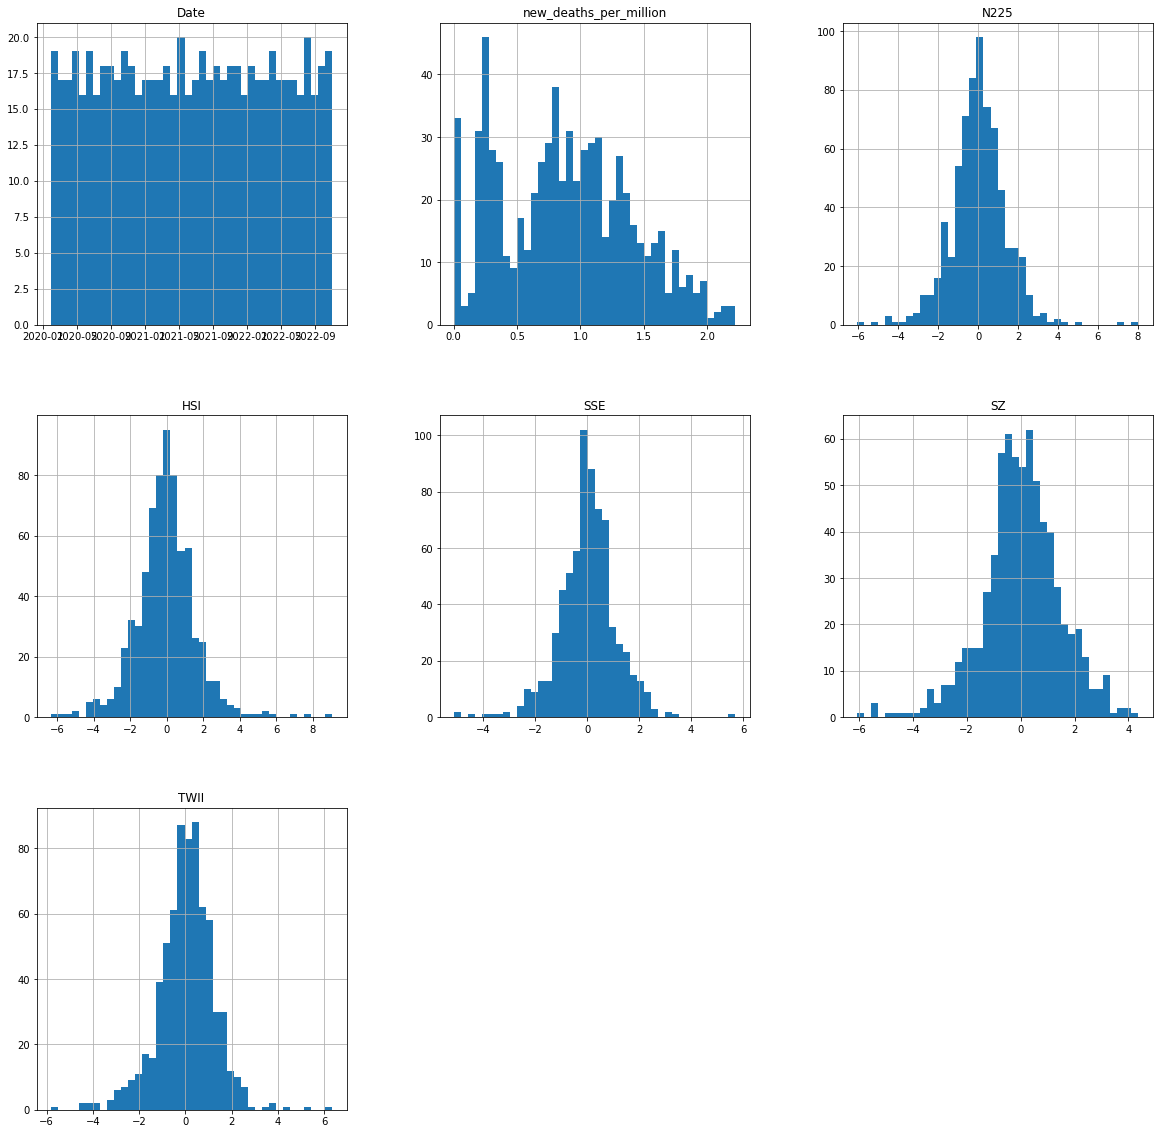

In [24]:
# Histogram of daily returns
# Stock returns are normally distributed with zero mean 
stocks_daily_return.hist(figsize=(20, 20), bins = 40);

In [26]:
# Group all data returns together in a list
# Make a copy of the daily returns dataframe
df_hist = stocks_daily_return.copy()

# Drop the date
df_hist = df_hist.drop(columns = ['Date'])

data = []

# Loop through every column
for i in df_hist.columns:
  data.append(stocks_daily_return[i].values)
data

[array([3.000e-03, 6.000e-03, 0.000e+00, 5.000e-03, 5.000e-03, 8.000e-03,
        8.000e-03, 9.000e-03, 9.000e-03, 1.100e-02, 1.300e-02, 1.300e-02,
        1.000e-03, 3.200e-02, 1.900e-02, 1.800e-02, 1.400e-02, 1.600e-02,
        1.000e-03, 2.000e-02, 1.000e-02, 8.000e-03, 5.000e-03, 7.000e-03,
        1.100e-02, 9.000e-03, 1.200e-02, 1.200e-02, 1.400e-02, 2.400e-02,
        3.400e-02, 4.400e-02, 4.000e-02, 6.300e-02, 9.000e-02, 1.070e-01,
        1.200e-01, 1.430e-01, 1.970e-01, 2.630e-01, 3.040e-01, 3.730e-01,
        4.080e-01, 4.560e-01, 5.480e-01, 6.480e-01, 8.330e-01, 7.830e-01,
        8.150e-01, 8.060e-01, 1.068e+00, 9.050e-01, 1.022e+00, 8.170e-01,
        9.230e-01, 1.099e+00, 9.670e-01, 9.520e-01, 8.160e-01, 9.020e-01,
        9.120e-01, 9.120e-01, 8.570e-01, 6.830e-01, 8.310e-01, 8.750e-01,
        7.840e-01, 7.010e-01, 6.070e-01, 7.710e-01, 8.480e-01, 7.360e-01,
        7.460e-01, 5.110e-01, 7.200e-01, 6.820e-01, 7.210e-01, 7.220e-01,
        5.510e-01, 6.500e-01, 6.780e-0

In [27]:
fig = ff.create_distplot(data, df_hist.columns)
fig.show()

In [28]:
# Get the mean values
stocks_df.mean()

<ipython-input-28-f05962e54e72>:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.



new_deaths_per_million        0.881292
N225                      26312.611144
HSI                       24315.460234
SSE                        3306.333245
SZ                        13030.744124
TWII                      14938.675475
dtype: float64

In [29]:
# Get the standard deviation of stocks (Volatility)
stocks_df.std()

Date                      293 days 06:05:31.366845596
new_deaths_per_million                       0.518464
N225                                      3032.833741
HSI                                       3397.510262
SSE                                        244.202631
SZ                                        1553.436275
TWII                                      2432.643194
dtype: object

In [30]:
# Statistical data of the dataframe
stocks_df.describe()

,new_deaths_per_million,N225,HSI,SSE,SZ,TWII
count,701.000000,701.000000,701.000000,701.000000,701.000000,701.000000
mean,0.881292,26312.611144,24315.460234,3306.333245,13030.744124,14938.675475
std,0.518464,3032.833741,3397.510262,244.202631,1553.436275,2432.643194
min,0.000000,16552.830078,14687.019531,2660.169922,9691.530273,8681.339844
25%,0.408000,23567.039063,21996.890625,3149.060059,11520.209961,12833.290039
50%,0.870000,27350.300781,24643.890625,3355.366943,13428.400391,15410.089844
75%,1.260000,28542.109375,26502.839844,3510.959961,14414.160156,17147.410156
max,2.224000,30670.099609,31084.939453,3715.370117,15962.250000,18526.349609


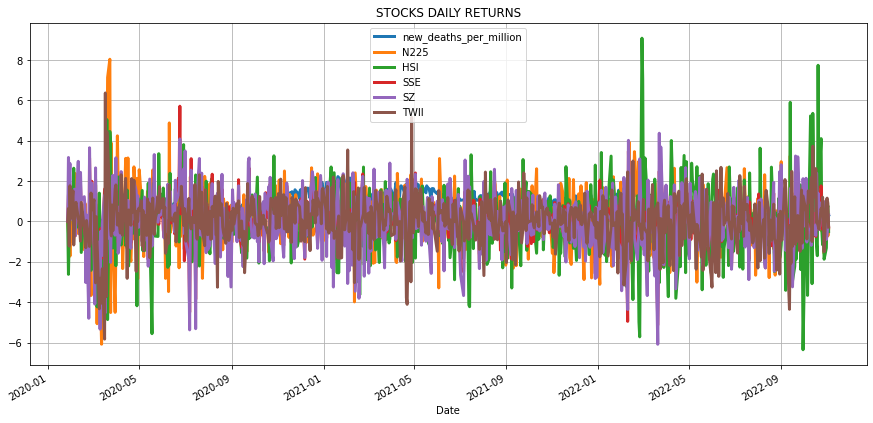

In [31]:
show_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [32]:
interactive_plot(stocks_daily_return, 'STOCKS DAILY RETURNS')

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex
from statsmodels.tsa.stattools import adfuller

#Pruebas de cointegracion de orden 0 con datos de retorno

In [34]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['N225'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-4.58027707186997, 0.00014042464661145977, 13, 687, {'1%': -3.439904442607456, '5%': -2.8657562268758907, '10%': -2.569015252972123}, 2418.9460670361773)


In [35]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['HSI'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-7.251094104269603, 1.7792767427632805e-10, 7, 693, {'1%': -3.4398214107097225, '5%': -2.8657196436385663, '10%': -2.5689957624690525}, 2640.0189127786225)


In [36]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['SSE'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-4.690840111911222, 8.755094695977714e-05, 10, 690, {'1%': -3.4398627454742488, '5%': -2.8657378555534248, '10%': -2.569005465238395}, 2105.5942236489127)


In [37]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['SZ'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-4.484052320053543, 0.00021010716328756328, 12, 688, {'1%': -3.439890503006147, '5%': -2.865750085260771, '10%': -2.569011980884938}, 2465.820890204665)


In [38]:
test_1 = adfuller(stocks_daily_return['new_deaths_per_million'] - stocks_daily_return['TWII'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-6.96323740507583, 9.051076964611587e-10, 6, 694, {'1%': -3.4398077121659765, '5%': -2.865713608066101, '10%': -2.5689925469026402}, 2253.2812762044086)


Pruebas de cointegracion de orden 1 con los datos a nivel

In [39]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['N225'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.7258980376745714, 0.4178208390043493, 2, 698, {'1%': -3.439753311961436, '5%': -2.8656896390914217, '10%': -2.568979777013325}, 9875.250896563171)


In [40]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['HSI'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-0.870867864673508, 0.7974146291609892, 0, 700, {'1%': -3.4397263458688045, '5%': -2.8656777575510204, '10%': -2.5689734469387755}, 9974.657647539574)


In [41]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['SSE'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-2.5680452923406696, 0.09978312587095955, 0, 700, {'1%': -3.4397263458688045, '5%': -2.8656777575510204, '10%': -2.5689734469387755}, 6766.204200123684)


In [42]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['SZ'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-2.094747574876065, 0.2466318665425784, 0, 700, {'1%': -3.4397263458688045, '5%': -2.8656777575510204, '10%': -2.5689734469387755}, 9021.13689131806)


In [43]:
test_1 = adfuller(stocks_df['new_deaths_per_million'] - stocks_df['TWII'])
print("The p-value for the ADF test on the cointegrated is ", test_1)

The p-value for the ADF test on the cointegrated is  (-1.4998039970220847, 0.5336082965519912, 0, 700, {'1%': -3.4397263458688045, '5%': -2.8656777575510204, '10%': -2.5689734469387755}, 8961.604269219675)


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.arima_model import ARIMA
from scipy.stats.distributions import chi2 
from statsmodels.tsa.seasonal import seasonal_decompose
from math import sqrt
import seaborn as sns
sns.set()
from IPython.display import display, Math, Latex
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from statsmodels.tsa.stattools import grangercausalitytests

In [45]:
!pip install arch


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 907.3/907.3 KB 17.9 MB/s eta 0:00:00


In [46]:
from arch import arch_model


In [47]:
from arch.unitroot import PhillipsPerron

pp = PhillipsPerron(stocks_df["new_deaths_per_million"])
print(pp.summary().as_text())

     Phillips-Perron Test (Z-tau)    
Test Statistic                 -4.386
P-value                         0.000
Lags                               20
-------------------------------------

Trend: Constant
Critical Values: -3.44 (1%), -2.87 (5%), -2.57 (10%)
Null Hypothesis: The process contains a unit root.
Alternative Hypothesis: The process is weakly stationary.


Prueba de causalidad

In [48]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'N225']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0481  , p=0.9860  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=0.1458  , p=0.9858  , df=3
likelihood ratio test: chi2=0.1458  , p=0.9858  , df=3
parameter F test:         F=0.0481  , p=0.9860  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (0.048122306650224274, 0.9860144325217614, 691.0, 3),
   'ssr_chi2test': (0.14582939236696038, 0.9858203383278822, 3),
   'lrtest': (0.14581416081227871, 0.9858224955789656, 3),
   'params_ftest': (0.04812230665021148, 0.9860144325217722, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [49]:
grangercausalitytests(stocks_daily_return[['N225', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.5149  , p=0.6721  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=1.5605  , p=0.6684  , df=3
likelihood ratio test: chi2=1.5587  , p=0.6688  , df=3
parameter F test:         F=0.5149  , p=0.6721  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (0.5149431941524134, 0.672102388881836, 691.0, 3),
   'ssr_chi2test': (1.5604790861869082, 0.6683837422466021, 3),
   'lrtest': (1.5587373442699572, 0.6687816084009914, 3),
   'params_ftest': (0.5149431941525225, 0.6721023888817657, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [50]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'HSI']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8249  , p=0.4804  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=2.4997  , p=0.4753  , df=3
likelihood ratio test: chi2=2.4952  , p=0.4762  , df=3
parameter F test:         F=0.8249  , p=0.4804  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (0.8248716342561844, 0.48037617890474194, 691.0, 3),
   'ssr_chi2test': (2.499683360539002, 0.47534830990193366, 3),
   'lrtest': (2.4952180747686725, 0.4761559042265553, 3),
   'params_ftest': (0.8248716342561018, 0.48037617890478435, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [51]:
grangercausalitytests(stocks_daily_return[['HSI', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8839  , p=0.4491  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=2.6785  , p=0.4439  , df=3
likelihood ratio test: chi2=2.6734  , p=0.4448  , df=3
parameter F test:         F=0.8839  , p=0.4491  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (0.8838862364868719, 0.44905072507410715, 691.0, 3),
   'ssr_chi2test': (2.6785206645492186, 0.4438898321495156, 3),
   'lrtest': (2.6733944673483165, 0.44476757681195933, 3),
   'params_ftest': (0.8838862364868664, 0.4490507250741338, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [52]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'SSE']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.0839  , p=0.9688  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=0.2543  , p=0.9684  , df=3
likelihood ratio test: chi2=0.2542  , p=0.9684  , df=3
parameter F test:         F=0.0839  , p=0.9688  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (0.08390588055140764, 0.968813622825382, 691.0, 3),
   'ssr_chi2test': (0.25426760329181997, 0.9683867751906641, 3),
   'lrtest': (0.254221302204769, 0.9683949771670505, 3),
   'params_ftest': (0.08390588055141505, 0.9688136228253683, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [53]:
grangercausalitytests(stocks_daily_return[['SSE', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.8040  , p=0.4919  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=2.4364  , p=0.4869  , df=3
likelihood ratio test: chi2=2.4321  , p=0.4877  , df=3
parameter F test:         F=0.8040  , p=0.4919  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (0.8039764864126533, 0.49187413238538136, 691.0, 3),
   'ssr_chi2test': (2.436362898043554, 0.4869015767622812, 3),
   'lrtest': (2.432120715014662, 0.4876833709460935, 3),
   'params_ftest': (0.8039764864126617, 0.49187413238538136, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [54]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'SZ']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.2305  , p=0.8752  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=0.6985  , p=0.8736  , df=3
likelihood ratio test: chi2=0.6981  , p=0.8736  , df=3
parameter F test:         F=0.2305  , p=0.8752  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (0.2304976857922882, 0.8751668648395866, 691.0, 3),
   'ssr_chi2test': (0.6984980521693943, 0.873557165425206, 3),
   'lrtest': (0.6981487869302327, 0.8736392865194764, 3),
   'params_ftest': (0.23049768579239646, 0.8751668648394964, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [55]:
grangercausalitytests(stocks_daily_return[['SZ', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.1545  , p=0.3263  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=3.4986  , p=0.3209  , df=3
likelihood ratio test: chi2=3.4899  , p=0.3221  , df=3
parameter F test:         F=1.1545  , p=0.3263  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (1.1545162439041006, 0.3263300690759312, 691.0, 3),
   'ssr_chi2test': (3.498635332467708, 0.32093915674350415, 3),
   'lrtest': (3.4898962924344232, 0.3220749040181694, 3),
   'params_ftest': (1.1545162439041399, 0.326330069075893, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [56]:
grangercausalitytests(stocks_daily_return[['new_deaths_per_million', 'TWII']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=0.3932  , p=0.7579  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=1.1915  , p=0.7550  , df=3
likelihood ratio test: chi2=1.1905  , p=0.7553  , df=3
parameter F test:         F=0.3932  , p=0.7579  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (0.39319407348620544, 0.7579422632506209, 691.0, 3),
   'ssr_chi2test': (1.1915316785529873, 0.7550360733782957, 3),
   'lrtest': (1.1905158232007125, 0.7552798963511143, 3),
   'params_ftest': (0.393194073486189, 0.7579422632506394, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [57]:
grangercausalitytests(stocks_daily_return[['TWII', 'new_deaths_per_million']], maxlag=[3])



Granger Causality
number of lags (no zero) 3
ssr based F test:         F=1.3650  , p=0.2523  , df_denom=691, df_num=3
ssr based chi2 test:   chi2=4.1365  , p=0.2471  , df=3
likelihood ratio test: chi2=4.1243  , p=0.2484  , df=3
parameter F test:         F=1.3650  , p=0.2523  , df_denom=691, df_num=3


{3: ({'ssr_ftest': (1.3649935937248452, 0.25234229293899396, 691.0, 3),
   'ssr_chi2test': (4.136463943936072, 0.24710053249872663, 3),
   'lrtest': (4.124255466948853, 0.24835560723143862, 3),
   'params_ftest': (1.3649935937248097, 0.25234229293902877, 691.0, 3.0)},
   array([[0., 0., 0., 1., 0., 0., 0.],
          [0., 0., 0., 0., 1., 0., 0.],
          [0., 0., 0., 0., 0., 1., 0.]])])}

In [59]:
stocks_daily_return.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 701 entries, 0 to 700
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Date                    701 non-null    datetime64[ns]
 1   new_deaths_per_million  701 non-null    float64       
 2   N225                    701 non-null    float64       
 3   HSI                     701 non-null    float64       
 4   SSE                     701 non-null    float64       
 5   SZ                      701 non-null    float64       
 6   TWII                    701 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 38.5 KB


In [69]:
dfl = stocks_daily_return[['N225','HSI','SSE','TWII','new_deaths_per_million']]

In [70]:
dfl

,N225,HSI,SSE,TWII,new_deaths_per_million
0,0.000000,0.000000,0.000000,0.000000,0.003
1,-0.547470,-2.619600,1.335544,0.642278,0.006
2,0.705081,-0.516085,1.250313,-1.219473,0.000
3,-1.717967,0.168549,1.718261,1.770158,0.005
4,0.989782,1.210306,0.329667,0.153170,0.005
...,...,...,...,...,...
696,-1.587821,-1.870936,0.300244,-1.499743,0.184
697,0.152999,-1.311176,-0.870295,1.049467,0.151
698,0.235326,0.570466,-0.085245,1.155094,0.348
699,-0.715304,0.782306,0.006295,0.895524,0.225


In [71]:
import pandas as pd
import numpy as np
from statsmodels.tsa.vector_ar.vecm import coint_johansen


df = dfl

res = coint_johansen(df, det_order=0, k_ar_diff=1)
res.eig

array([0.41369673, 0.36563749, 0.338955  , 0.21476112, 0.0146158 ])

In [72]:
result = res

print(result.lr1)                           
print(result.cvt)                           
print(result.eig)
print(result.evec)
print(result.lr2)
print(result.max_eig_stat)
print(result.max_eig_stat_crit_vals)
print(result.meth)
print(result.trace_stat)
print(result.trace_stat_crit_vals)
print(result.evec[:,0])

[1159.97450292  786.76575697  468.62659748  179.28718019   10.29183786]
[[65.8202 69.8189 77.8202]
 [44.4929 47.8545 54.6815]
 [27.0669 29.7961 35.4628]
 [13.4294 15.4943 19.9349]
 [ 2.7055  3.8415  6.6349]]
[0.41369673 0.36563749 0.338955   0.21476112 0.0146158 ]
[[ 5.25368754e-01 -3.11688502e-01  8.11884261e-01 -3.80697356e-01
   4.36110341e-03]
 [ 2.85258899e-01  8.08496246e-01 -5.55443777e-02 -1.87692717e-01
  -1.03008017e-03]
 [ 5.19946086e-01 -4.35706771e-01 -9.63118988e-01 -5.67696811e-01
  -1.17571210e-02]
 [-9.75934479e-01  1.14452664e-01 -1.80743794e-01 -6.91814463e-01
   4.10530563e-03]
 [ 8.19111183e-02 -5.03887235e-02 -8.79476116e-02  1.66551673e-01
  -1.96573350e+00]]
[373.20874594 318.13915949 289.33941729 168.99534234  10.29183786]
[373.20874594 318.13915949 289.33941729 168.99534234  10.29183786]
[[31.2379 33.8777 39.3693]
 [25.1236 27.5858 32.7172]
 [18.8928 21.1314 25.865 ]
 [12.2971 14.2639 18.52  ]
 [ 2.7055  3.8415  6.6349]]
johansen
[1159.97450292  786.76575697  